In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Activation, Flatten,Input
from tensorflow.keras import models
import pickle as pkl

In [10]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


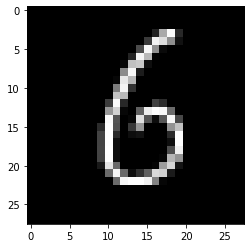

In [11]:
plt.imshow(x_train[18],cmap = 'gray')

In [12]:
x_train, x_test = x_train/255.0, x_test/255.0


In [13]:
x_train, x_test = np.expand_dims(x_train, axis=-1), np.expand_dims(x_test, axis=-1)
print(x_test.shape)

(10000, 28, 28, 1)


# Model

In [15]:
inputs = Input(shape=(28, 28, 1))

conv1 = Conv2D(32, (3, 3), padding="valid", activation='relu', name = 'conv1')(inputs)
max1 = MaxPooling2D((2, 2), (2, 2),name='maxpool_1')(conv1)

conv2 = Conv2D(64, (3, 3), padding="valid", activation='relu',name = 'conv2')(max1)
max2 = MaxPooling2D((2, 2), (2, 2),name='maxpool_2')(conv2)

conv3 = Conv2D(128, (3, 3), padding="valid", activation='relu', name = 'conv3')(max2)

flatten = Flatten(name = 'flatten')(conv3)

dense1 = Dense(128, activation='relu',name = 'dense1')(flatten)
outputs = Dense(10, activation='softmax',name = 'output')(dense1)


model = models.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 13, 13, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 11, 11, 64)        18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 5, 5, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0   

In [16]:
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])


In [17]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.1298 - acc: 0.9594
Epoch 2/3
60000/60000 [==============================] - 52s 860us/sample - loss: 0.0419 - acc: 0.9870
Epoch 3/3
60000/60000 [==============================] - 56s 930us/sample - loss: 0.0303 - acc: 0.9909


In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss, test_acc))

10000/10000 [==============================] - 2s 159us/sample - loss: 0.0332 - acc: 0.9895
Test Loss: 0.033223410281492394 - Test Acc: 0.9894999861717224
